# XMCD Analysis Example
Example data analysis of xas spectra from Diamond Light Source.

Includes generation of NeXus files for XAS spectra from beamline i06-1
and the processing of these spectra to calculate the XMCD spectra.

 - Author: Dan Porter
 - Diamond Light Source Ltd
 - 2025

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from xmcd_analysis_functions import load_from_dat, average_polarised_scans

files = [
    "data/236463.dat",
    "data/236464.dat",
    "data/236465.dat",
    "data/236466.dat",
    "data/236467.dat",
    "data/236468.dat",
    "data/236469.dat",
    "data/236470.dat",
]

### Load data

The `load_from_dat` function returns a `SpectraContainer` object containing `Spectra` objects for each channel. The `SpectraContainer` can be operated on as if it was a Numpy ndarray and will operate on each contained spectra.

When Spectra are loaded from the file, they are automatically normalised by the monitor signal.

In [49]:
# Load data
scans = [load_from_dat(f, sample_name='Mn') for f in files]

for scan in scans:
    print(scan)
    print(str(scan.metadata)[:100], '\n')


SpectraContainer('236463', 'raw', ['tey', 'tfy'])
{'filename': 'data/236463.dat', 'beamline': 'i06-1   ', 'scan_no': 236463, 'start_date_iso': '2021-0 

SpectraContainer('236464', 'raw', ['tey', 'tfy'])
{'filename': 'data/236464.dat', 'beamline': 'i06-1   ', 'scan_no': 236464, 'start_date_iso': '2021-0 

SpectraContainer('236465', 'raw', ['tey', 'tfy'])
{'filename': 'data/236465.dat', 'beamline': 'i06-1   ', 'scan_no': 236465, 'start_date_iso': '2021-0 

SpectraContainer('236466', 'raw', ['tey', 'tfy'])
{'filename': 'data/236466.dat', 'beamline': 'i06-1   ', 'scan_no': 236466, 'start_date_iso': '2021-0 

SpectraContainer('236467', 'raw', ['tey', 'tfy'])
{'filename': 'data/236467.dat', 'beamline': 'i06-1   ', 'scan_no': 236467, 'start_date_iso': '2021-0 

SpectraContainer('236468', 'raw', ['tey', 'tfy'])
{'filename': 'data/236468.dat', 'beamline': 'i06-1   ', 'scan_no': 236468, 'start_date_iso': '2021-0 

SpectraContainer('236469', 'raw', ['tey', 'tfy'])
{'filename': 'data/236469.dat', 

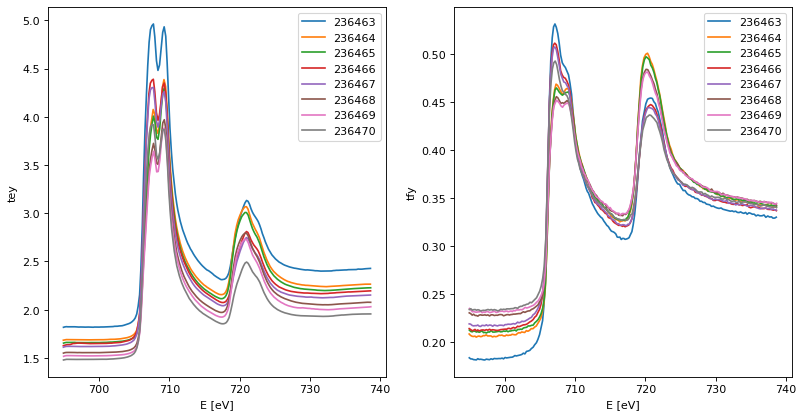

In [50]:
# Plot Raw data
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
for scan in scans:
    for n, (mode, spectra) in enumerate(scan.spectra.items()):
        spectra.plot(ax=axes[n], label=scan.name)
        axes[n].set_ylabel(mode)

for ax in axes.flat:
    ax.set_xlabel('E [eV]')
    ax.legend()

### Divide by Flat-PreEdge Region

Normalise by pre-edge
SpectraContainer('236463', 'divide_by_preedge', ['tey', 'tfy'])
SpectraContainer('236464', 'divide_by_preedge', ['tey', 'tfy'])
SpectraContainer('236465', 'divide_by_preedge', ['tey', 'tfy'])
SpectraContainer('236466', 'divide_by_preedge', ['tey', 'tfy'])
SpectraContainer('236467', 'divide_by_preedge', ['tey', 'tfy'])
SpectraContainer('236468', 'divide_by_preedge', ['tey', 'tfy'])
SpectraContainer('236469', 'divide_by_preedge', ['tey', 'tfy'])
SpectraContainer('236470', 'divide_by_preedge', ['tey', 'tfy'])


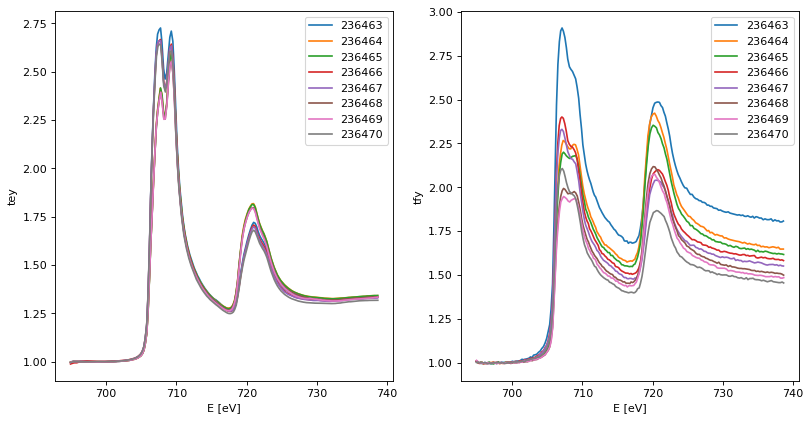

In [51]:
print('Normalise by pre-edge')
for scan in scans:
    scan.divide_by_preedge()
    print(scan)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
for scan in scans:
    for n, (mode, spectra) in enumerate(scan.spectra.items()):
        spectra.plot(ax=axes[n], label=scan.name)
        axes[n].set_ylabel(mode)

for ax in axes.flat:
    ax.set_xlabel('E [eV]')
    ax.legend()

### Fit Background

In [52]:
# Background options
print('Spectra.auto_edge_background()')
help(scans[0].auto_edge_background)

print('\nSpectra.remove_background(name)')
help(scans[0].remove_background)

Spectra.auto_edge_background()
Help on method auto_edge_background in module xmcd_analysis_functions.spectra:

auto_edge_background(peak_width_ev: 'float' = 5.0) -> 'Spectra' method of xmcd_analysis_functions.spectra_container.SpectraContainer instance
    Remove generic xray absorption background from spectra


Spectra.remove_background(name)
Help on method remove_background in module xmcd_analysis_functions.spectra:

remove_background(name='flat', *args, **kwargs) -> 'Spectra' method of xmcd_analysis_functions.spectra_container.SpectraContainer instance
            Return new Spectra object with background removed
            available functions:
    'flat': Subtract flat background. args: ev_from_start=5.0
    'norm': Normalise background to one. args: ev_from_start=5.0
    'linear': Use lmfit to determine sloping background. args: ev_from_start=5.0
    'curve': Use lmfit to determine sloping background. args: ev_from_start=5.0
    'exp': Use lmfit to determine sloping background. a

In [53]:
print('Fit and subtract background')
for scan in scans:
    scan.auto_edge_background(peak_width_ev=3.)
    print(scan)

print(f'Example fit - {scans[0].name}: TEY')
print(scans[0].spectra['tey'].process)


Fit and subtract background
SpectraContainer('236463', 'Auto_edge_background', ['tey', 'tfy'])
SpectraContainer('236464', 'Auto_edge_background', ['tey', 'tfy'])
SpectraContainer('236465', 'Auto_edge_background', ['tey', 'tfy'])
SpectraContainer('236466', 'Auto_edge_background', ['tey', 'tfy'])
SpectraContainer('236467', 'Auto_edge_background', ['tey', 'tfy'])
SpectraContainer('236468', 'Auto_edge_background', ['tey', 'tfy'])
SpectraContainer('236469', 'Auto_edge_background', ['tey', 'tfy'])
SpectraContainer('236470', 'Auto_edge_background', ['tey', 'tfy'])
Example fit - 236463: TEY
Background removal 'poly_edges', using function: 
    . args: *step_energies: float, peak_width_ev=5.0
peak_width_ev = 3.0
Edges:
   Fe L3: 707.0
  Fe L2: 720.0
Fit Report:
[[Model]]
    ((Model(polynomial, prefix='bkg_') + Model(step, prefix='edge1_', form='arctan')) + Model(step, prefix='edge2_', form='arctan'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 18000
    # data 

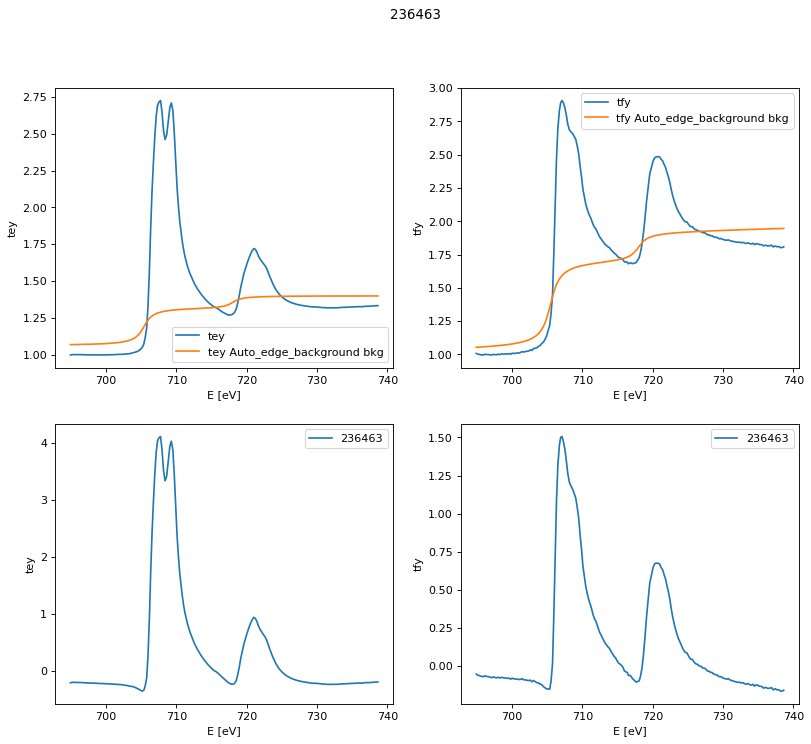

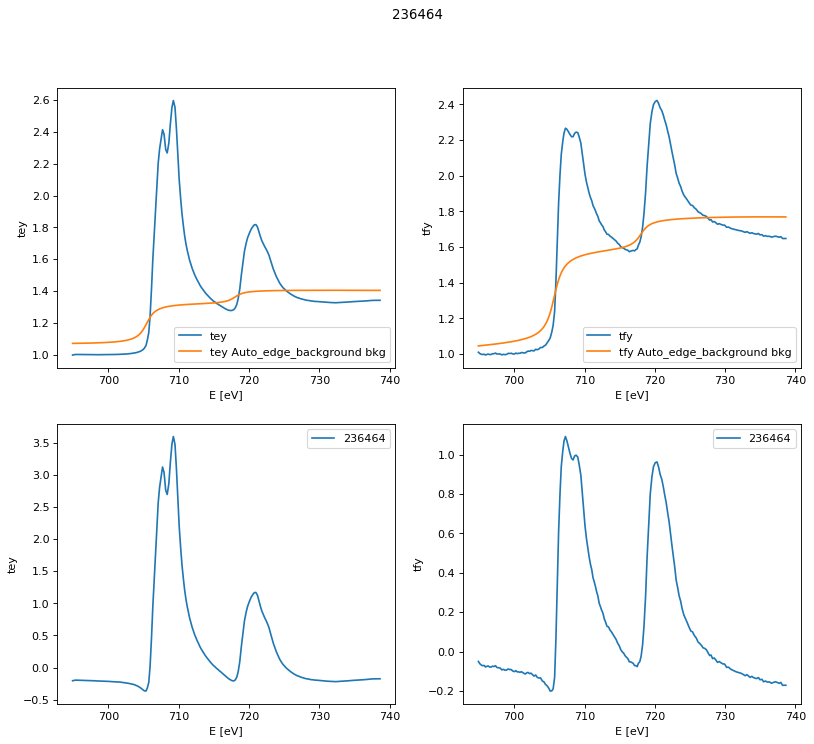

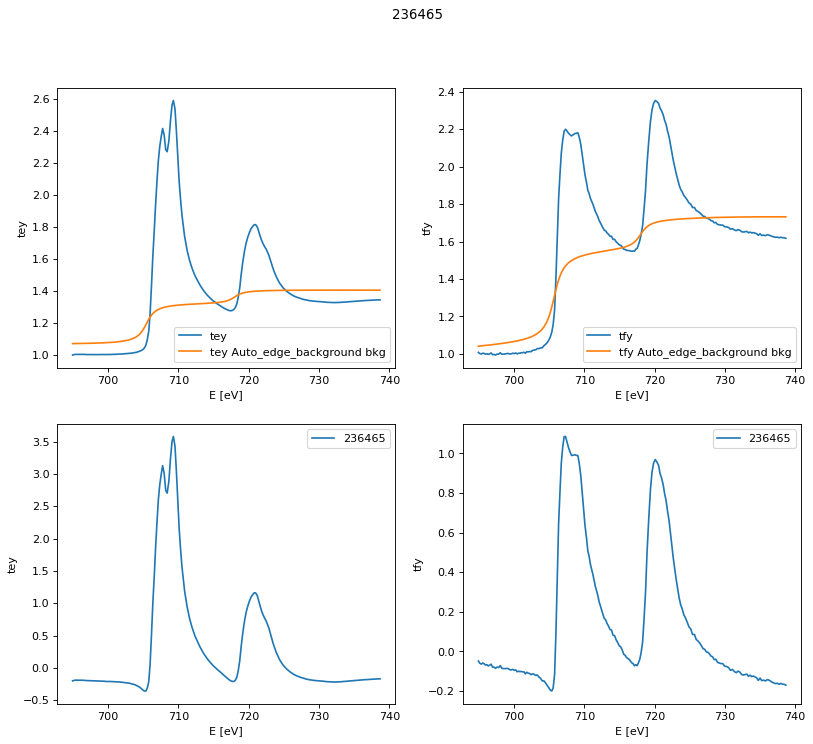

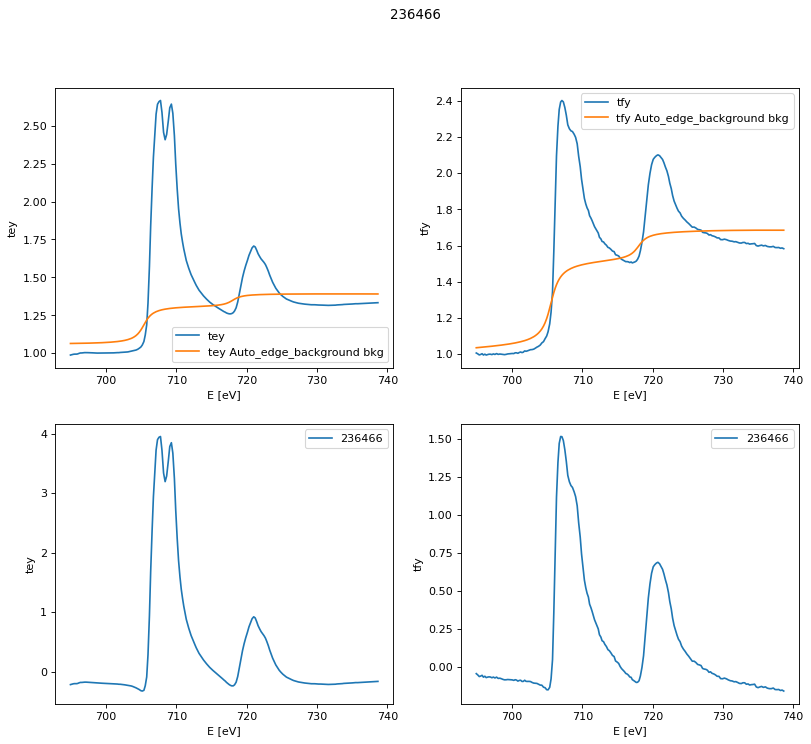

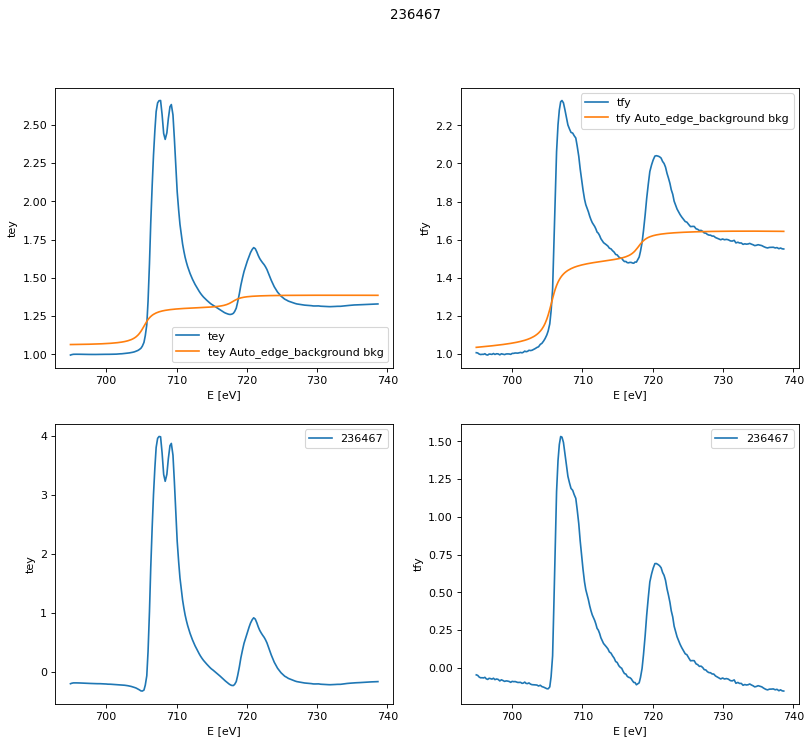

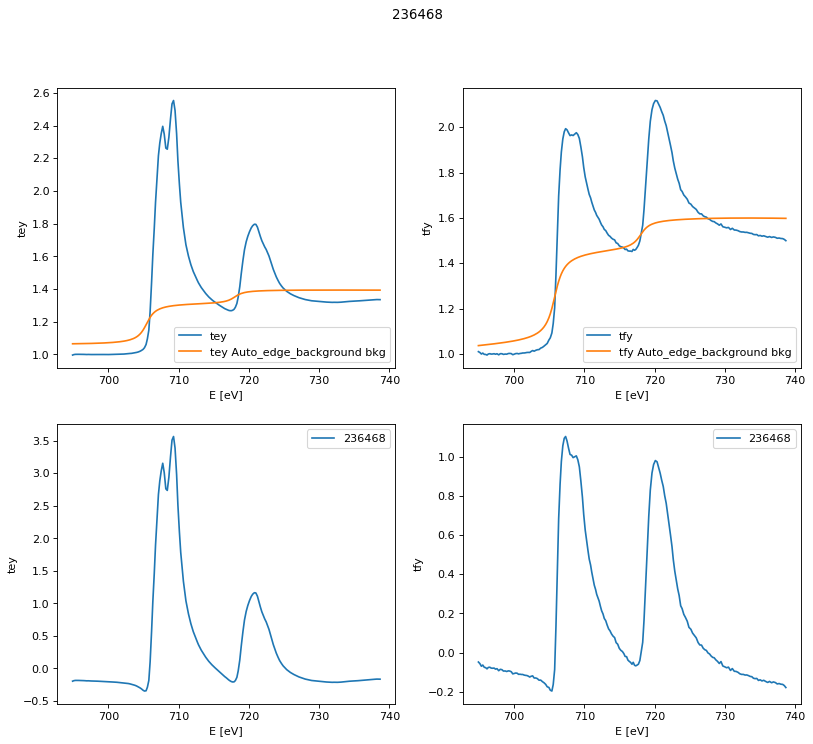

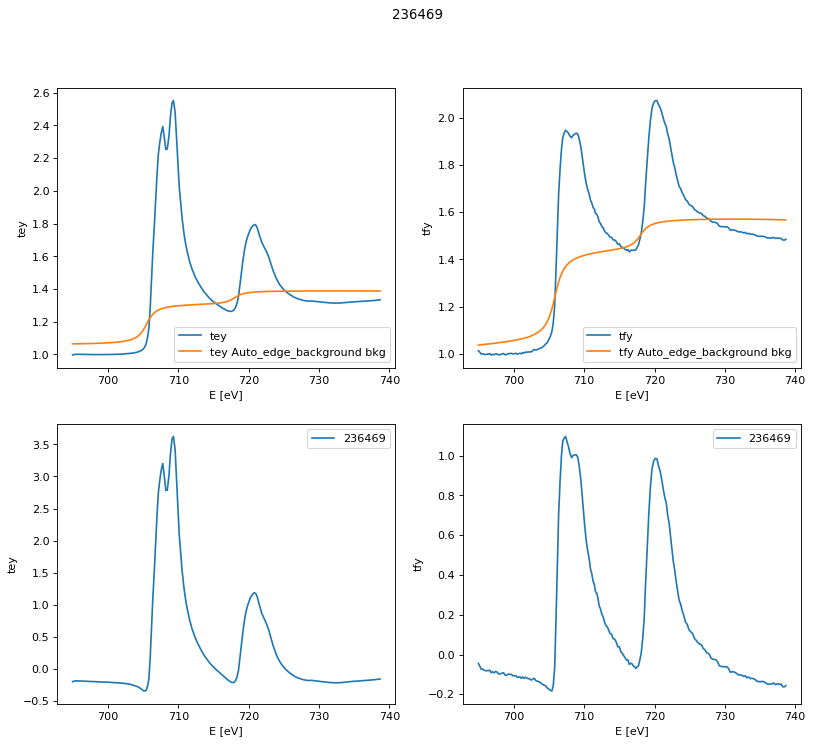

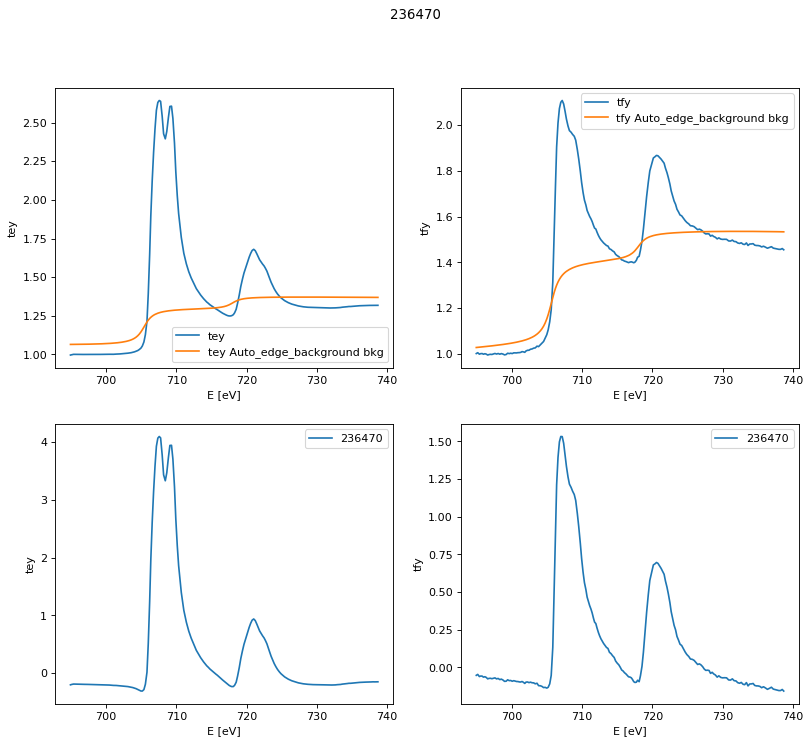

In [54]:
for scan in scans:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=80)
    fig.suptitle(scan.name)
    for n, (mode, spectra) in enumerate(scan.spectra.items()):
        spectra.plot_parents(ax=axes[0, n])
        spectra.plot_bkg(ax=axes[0, n])
        axes[0, n].set_ylabel(mode)

        spectra.plot(ax=axes[1, n], label=scan.name)
        axes[1, n].set_ylabel(mode)

    for ax in axes.flat:
        ax.set_xlabel('E [eV]')
        ax.legend()

### Average polarisations

236463: cr
236464: cl
236465: cl
236466: cr
236467: cr
236468: cl
236469: cl
236470: cr
SpectraContainer('cl', 'average', ['tey', 'tfy'])
SpectraContainer('cr', 'average', ['tey', 'tfy'])


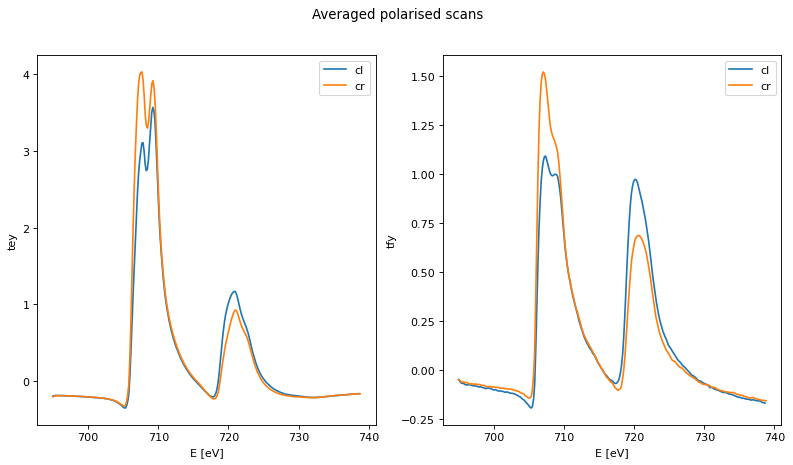

In [55]:
# Scan polarisations
for scan in scans:
    print(f"{scan.name}: {scan.metadata.pol}")
pol1, pol2 = average_polarised_scans(*scans)
print(pol1)
print(pol2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
fig.suptitle('Averaged polarised scans')
for scan in [pol1, pol2]:
    for n, (mode, spectra) in enumerate(scan.spectra.items()):
        spectra.plot(ax=axes[n], label=scan.name)
        axes[n].set_ylabel(mode)

for ax in axes.flat:
    ax.set_xlabel('E [eV]')
    ax.legend()

### Polarisation subtraction - XMCD

In [56]:
# Calculate XMCD
xmcd = pol1 - pol2
print(xmcd)

for name, spectra in xmcd.spectra.items():
    print(spectra)
    print(spectra.process)
    print(spectra.sum_rules_report(1))

SpectraContainer('xmcd', 'subtraction', ['tey', 'tfy'])
SpectraSubtraction('tey', energy=array(283,), signal=array(283,),process_label='subtraction')
Subtraction of spectra S1 - S2:
  S1: SpectraAverage('tey', energy=array(283,), signal=array(283,),process_label='average_cl')
  S2: SpectraAverage('tey', energy=array(280,), signal=array(280,),process_label='average_cr')
 n_holes = 1
L = 0.240 μB
S = 0.827 μB
SpectraSubtraction('tfy', energy=array(283,), signal=array(283,),process_label='subtraction')
Subtraction of spectra S1 - S2:
  S1: SpectraAverage('tfy', energy=array(283,), signal=array(283,),process_label='average_cl')
  S2: SpectraAverage('tfy', energy=array(280,), signal=array(280,),process_label='average_cr')
 n_holes = 1
L = 0.041 μB
S = 0.944 μB


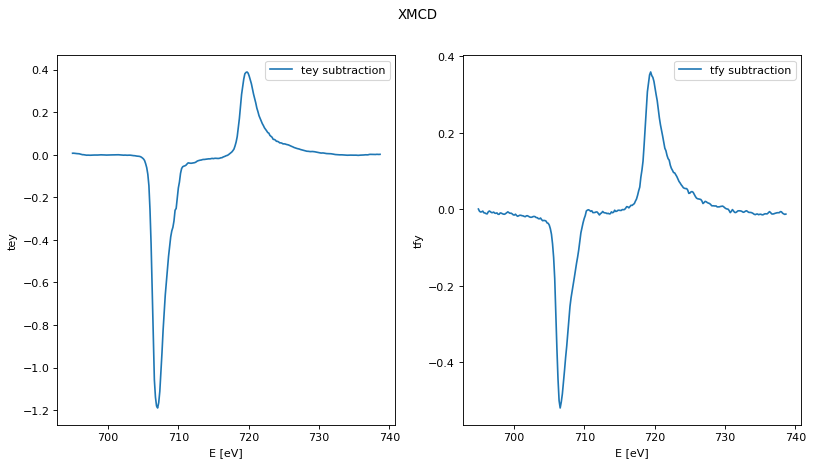

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
fig.suptitle('XMCD')
for n, (mode, spectra) in enumerate(xmcd.spectra.items()):
    spectra.plot(ax=axes[n])
    axes[n].set_ylabel(mode)

for ax in axes.flat:
    ax.set_xlabel('E [eV]')
    ax.legend()